In [1]:
import numpy as np
import pandas as pd

### Load the data

In [ ]:
df_train = pd.read_csv("data/train.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])
df_test = pd.read_csv("data/test.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])

In [3]:
emotions_map = {}
with open('data/emotions.txt', 'r') as f:
    for i,emotion in enumerate(f):
        emotions_map[str(i)] = emotion.strip()

In [4]:
df_train['List of classes'] = df_train['Class'].apply(lambda x: x.split(','))
for i in emotions_map:
    df_train[emotions_map[i]] = df_train['List of classes'].apply(lambda x: 1 if i in x else 0)
df_train.drop(['Class', 'ID', 'List of classes'], axis=1, inplace =True)

In [5]:
df_test['List of classes'] = df_test['Class'].apply(lambda x: x.split(','))
for i in emotions_map:
    df_test[emotions_map[i]] = df_test['List of classes'].apply(lambda x: 1 if i in x else 0)
df_test.drop(['Class', 'ID', 'List of classes'], axis=1, inplace =True)

In [6]:
df_train.head()

,Text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.to_csv("data/processed_train.csv", index=False)

In [8]:
df_test.to_csv("data/processed_test.csv", index = False)

### EDA - GoEmotion

#### Emotion Label Distribution

In [9]:
emotion_list = list(emotions_map.values())

In [10]:
import plotly.graph_objects as go

temp_list = df_train.drop(['Text'], axis=1).sum(axis=0).tolist()
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

As we see, main emotion -- "neutral", it has 14k of values. Next most frequent emotions are: admiration, approval and gratitude.

#### Most common words

In [11]:
df_emotions = pd.read_csv("data/emotion_words.csv")

In [12]:
df_emotions

,emotion,word,odds,freq
0,admiration,great,41.80,0.014
1,admiration,awesome,31.18,0.007
2,admiration,amazing,29.65,0.006
3,admiration,good,26.87,0.016
4,admiration,beautiful,22.87,0.004
...,...,...,...,...
1173,neutral,correlation,3.03,0.000
1174,neutral,hiv,3.03,0.000
1175,neutral,somebody,3.02,0.000
1176,neutral,slow,3.01,0.000


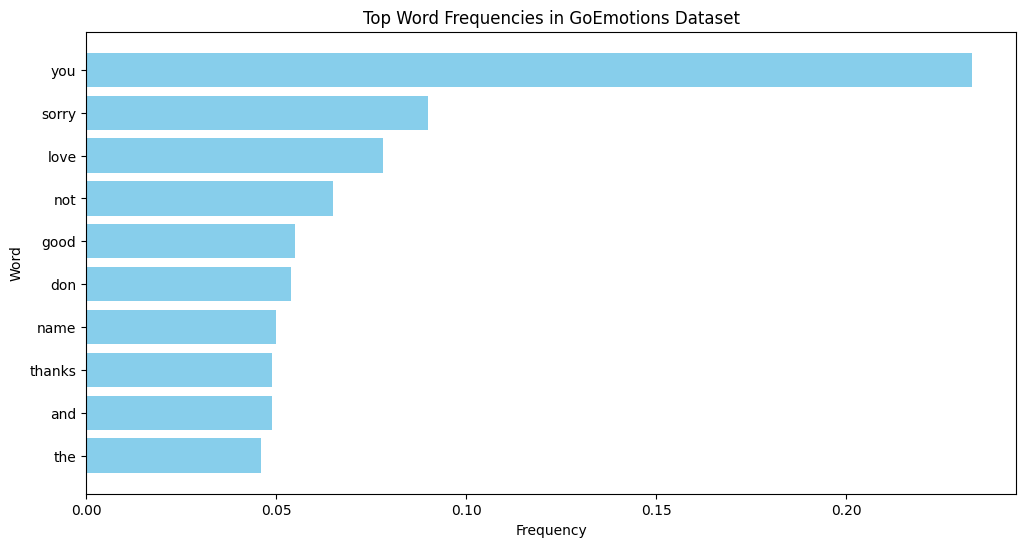

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

word_freq = df_emotions.groupby("word")["freq"].sum().reset_index()

word_freq = word_freq.sort_values(by="freq", ascending=False)

top_words = word_freq.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_words["word"], top_words["freq"], color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top Word Frequencies in GoEmotions Dataset")
plt.gca().invert_yaxis()
plt.show()


#### Wordclouds

In [14]:
wc_dict = {}
for i in df_emotions['emotion'].unique():
    wc_dict[i] = {}
    odds_list = df_emotions[df_emotions['emotion'] == i]['odds'].tolist()
    word_list = df_emotions[df_emotions['emotion'] == i]['word'].tolist()
    wc_dict[i] = dict(dict(zip(word_list,odds_list)))

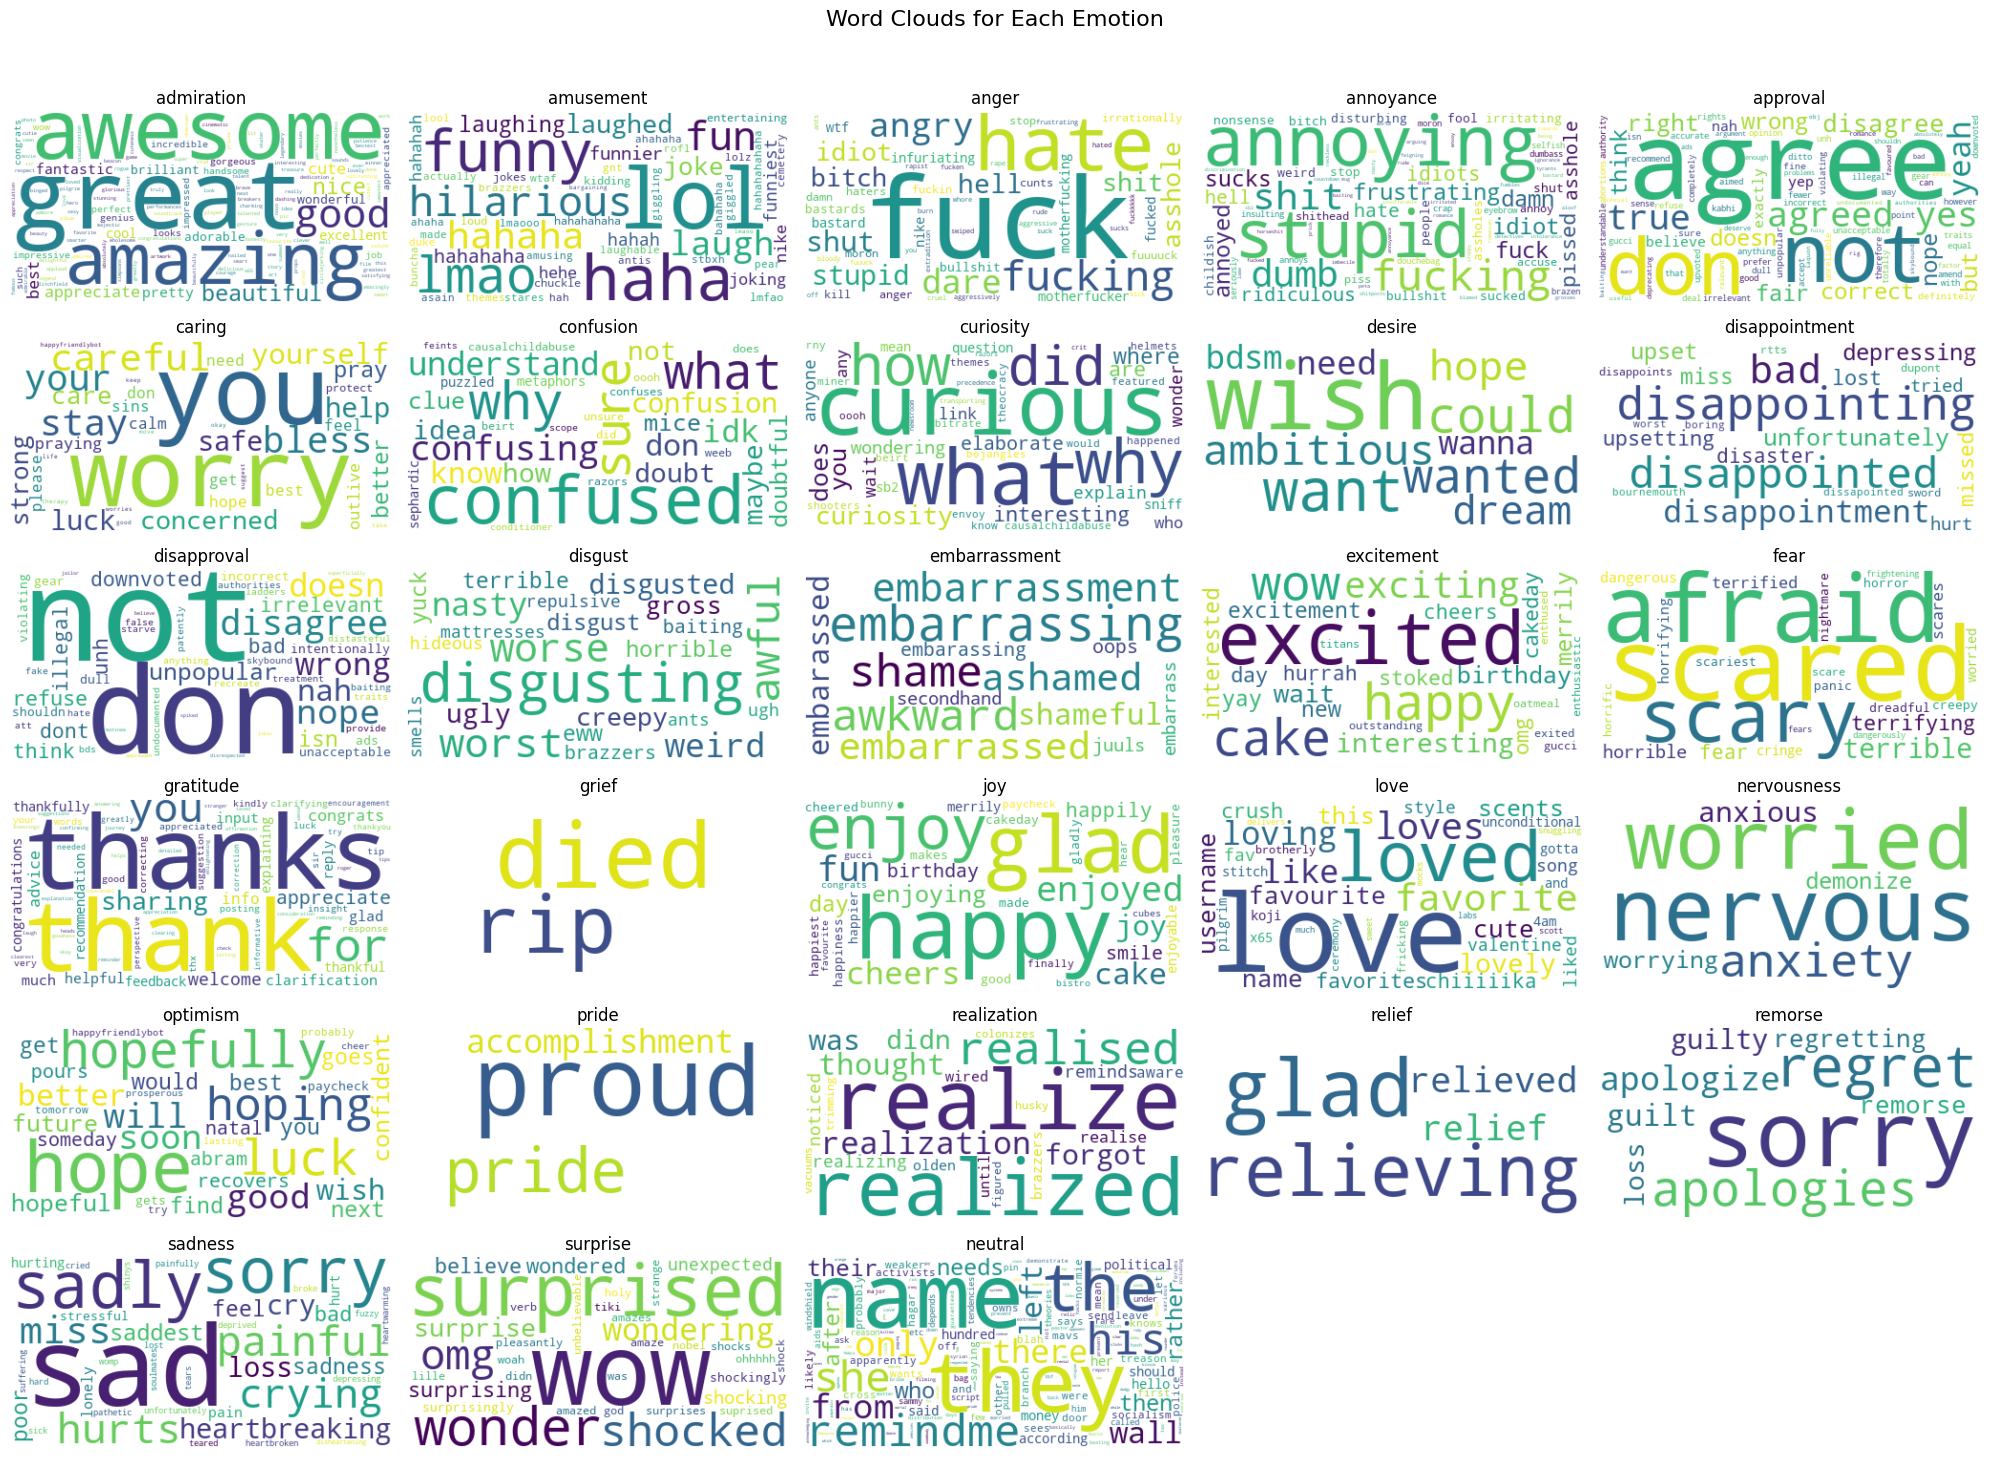

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define emotions
labels = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]

# Define grid layout
n_cols = 5  # Adjust number of columns
n_rows = -(-len(labels) // n_cols)  # Compute number of rows dynamically

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle("Word Clouds for Each Emotion", fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate and plot word clouds
for i, emotion in enumerate(labels):
    if emotion in wc_dict:  # Ensure the emotion exists in dictionary
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(wc_dict[emotion])
        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].set_title(emotion, fontsize=12)
        axes[i].axis("off")
    else:
        axes[i].axis("off")  # Hide empty subplots

# **Hide extra empty subplots**
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


This plot provides a visual overview of the word patterns associated with different emotions in the GoEmotions dataset. It allows us to identify common and unique words used to express specific emotions, providing insights into the linguistic nuances of emotional expression. Besides the "basic" information (most frequent words for each emotion) there are some interesting insights:
- There are common words. Some words appear across multiple emotions, such as "happy," "don't," and "not", then they are used in various emotional contexts.
- Also emotion-specific vocabulary. Each emotion has its own set of unique words, highlighting the diversity of emotional expression in language. 

### EDA - Lyrics dataset

In [16]:
lyrics_dataset = pd.read_csv("data/MultiLabel.csv")

In [17]:
lyrics_dataset

,artist,genre,title,album,year,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness"
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension"
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness"
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation"
...,...,...,...,...,...,...,...
1155,The Beatles,Rock,Yesterday,Help!,1965.0,Yesterday\nAll my troubles seemed so far away\...,"Nostalgia, Sadness, Tenderness"
1156,The Sundays,Rock,Love,Blind,1992.0,Picture myself as a thin white child\nBack to ...,"Calmness, Power, Tenderness"
1157,The Cure,Rock,Killing an Arab,Boys Don’t Cry,1978.0,Standing on the beach\nWith a gun in my hand\n...,"Power, Solemnity, Tension"
1158,Garth Brooks,Country,Mom,Man Against Machine,2014.0,"A little baby told God\nHey I'm kinda scared, ...",Tenderness


/var/folders/bg/qn578fsx6flctstnf05r7chr0000gn/T/ipykernel_64498/2995483590.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




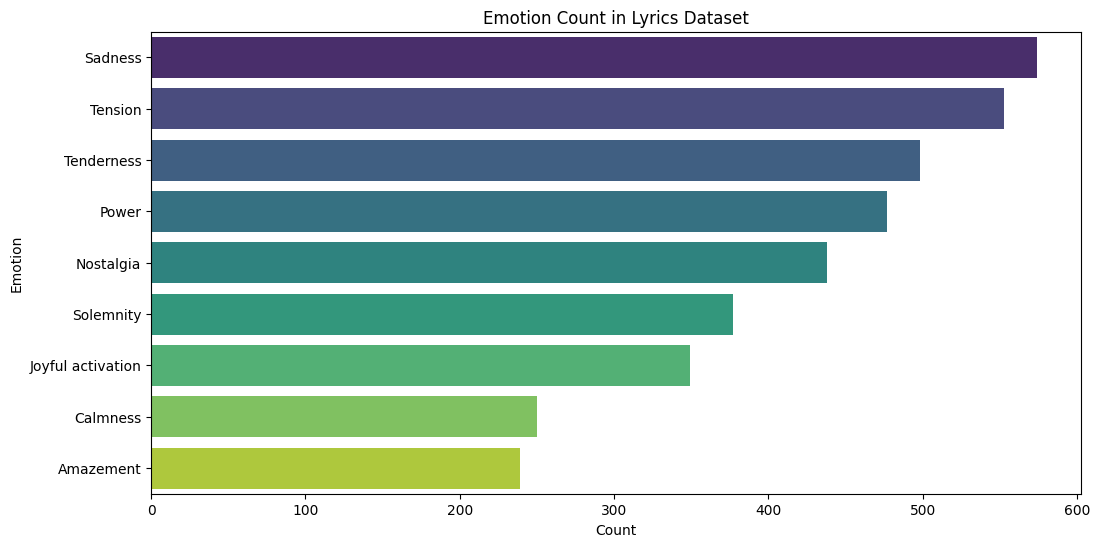

In [18]:
from collections import Counter
import seaborn as sns

# Flatten emotion labels
all_labels = [label.strip() for sublist in lyrics_dataset['labels'].dropna().str.split(", ") for label in sublist]
emotion_counts = pd.DataFrame(Counter(all_labels).most_common(), columns=["Emotion", "Count"])
emotion_counts_sorted = emotion_counts.sort_values(by="Count", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Emotion", data=emotion_counts_sorted, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.title("Emotion Count in Lyrics Dataset")
plt.show()


So, in our lyrics dataset the most frequent emotion is sadness, tension and tenderness are also relatively frequent. This high frequency of "Sadness" suggests that the lyrics dataset contains a big number of songs that have melancholic or sorrowful themes

In [19]:
from collections import defaultdict

wc_dict = defaultdict(lambda: defaultdict(int))

for _, row in lyrics_dataset.dropna(subset=['lyrics', 'labels']).iterrows():
    words = row['lyrics'].lower().split()
    emotions = row['labels'].split(", ")
    
    for emotion in emotions:
        for word in words:
            wc_dict[emotion][word] += 1 

wc_dict = {emotion: dict(word_freq) for emotion, word_freq in wc_dict.items()}

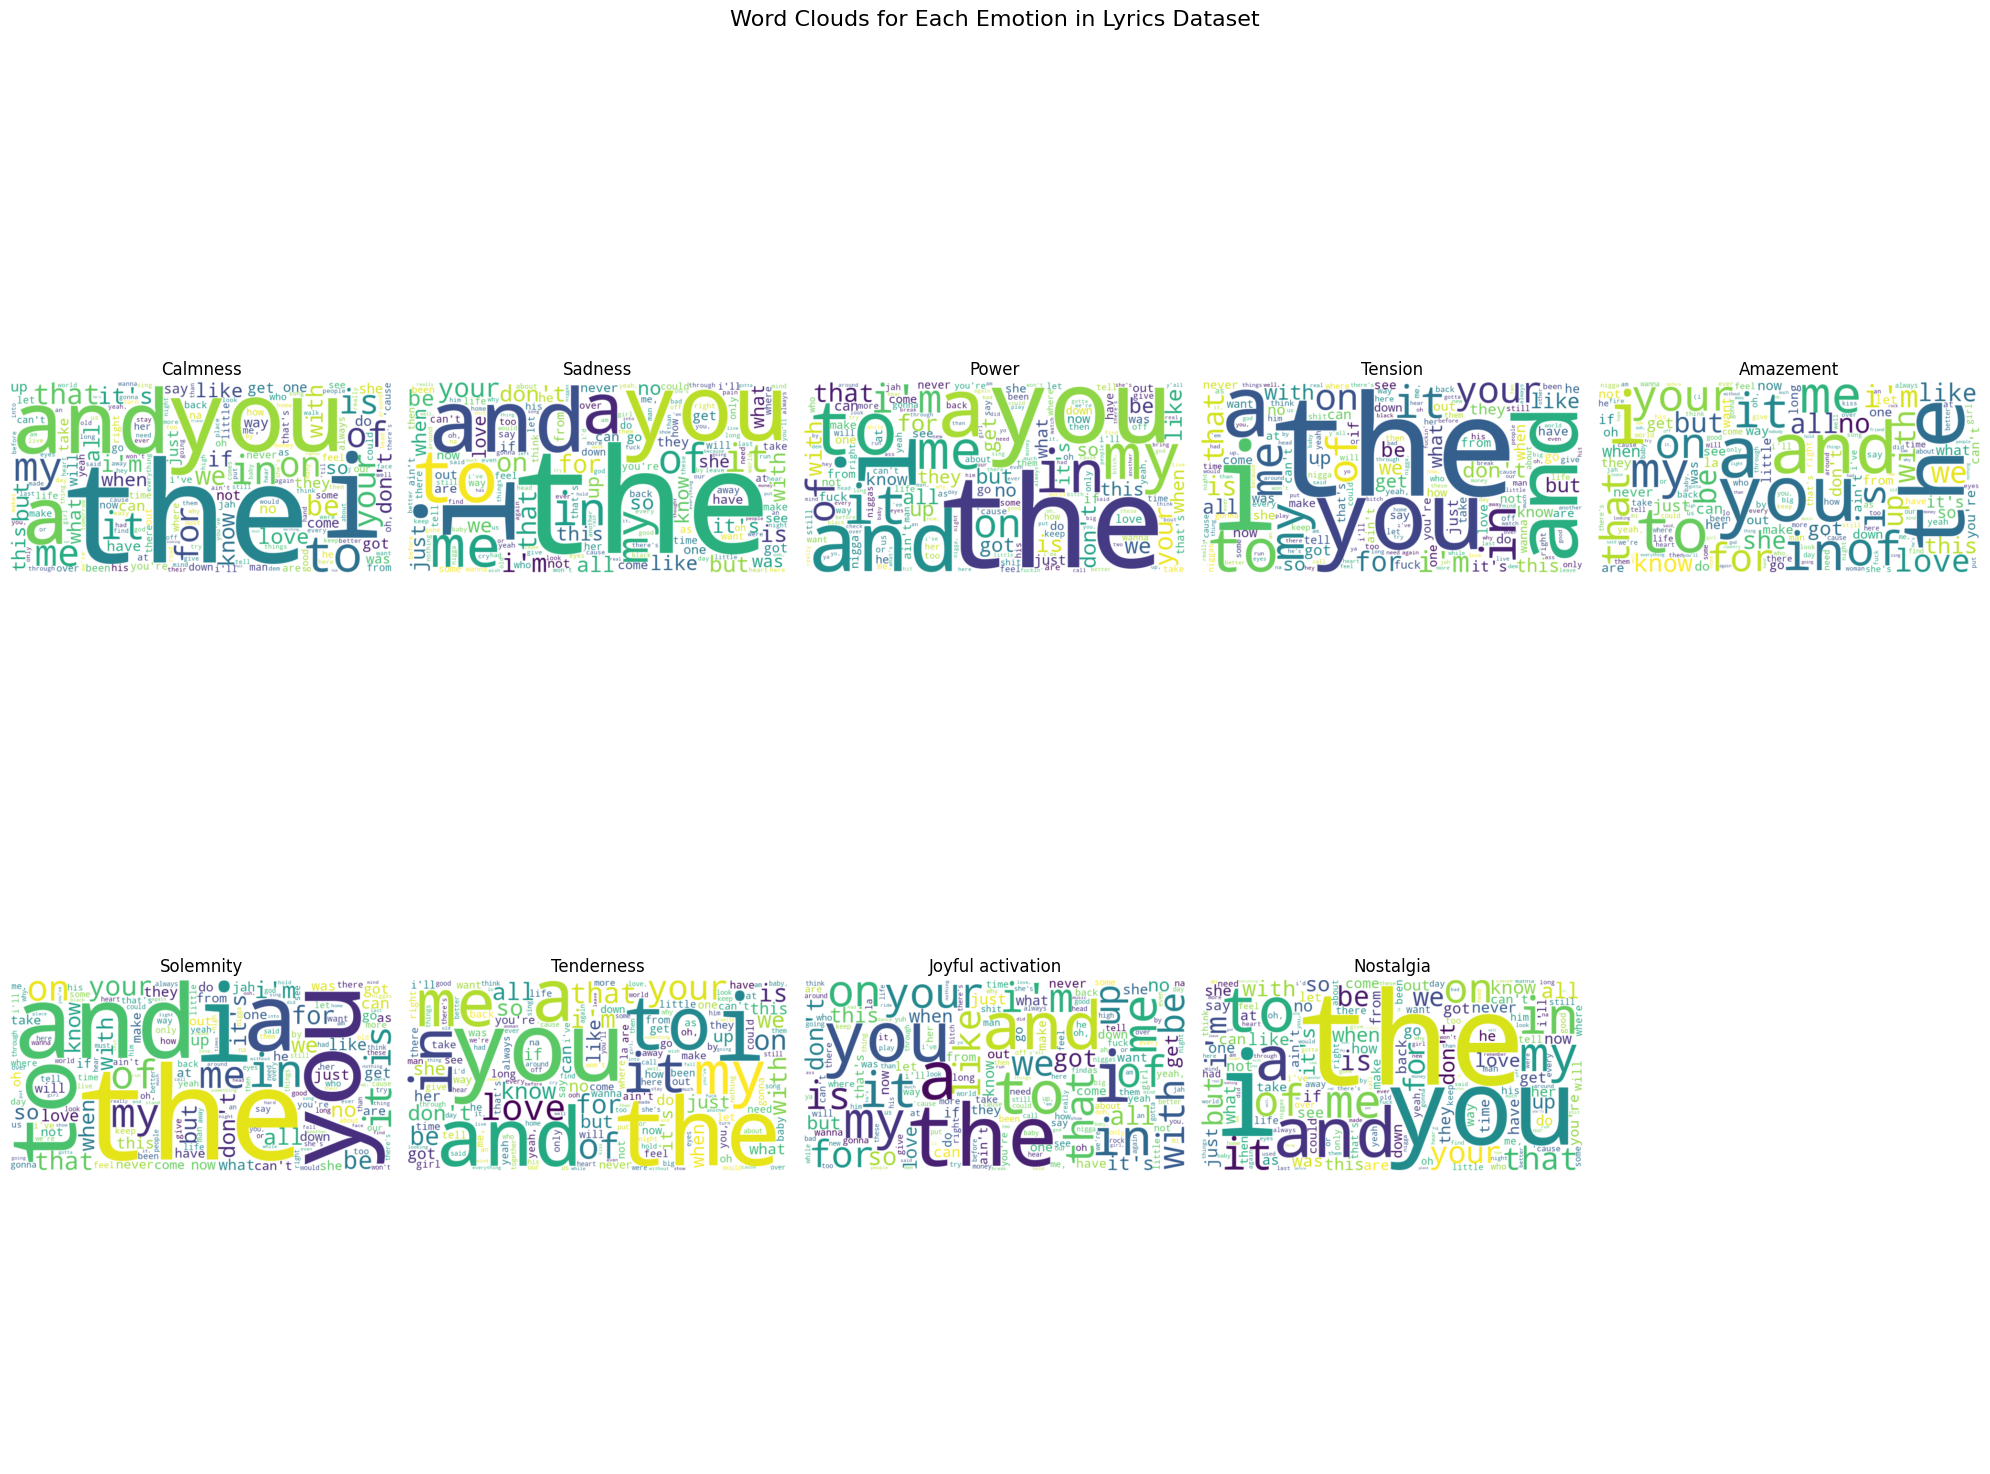

In [20]:
import matplotlib.pyplot as plt

labels = list(wc_dict.keys()) 

n_cols = 5  
n_rows = -(-len(labels) // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle("Word Clouds for Each Emotion in Lyrics Dataset", fontsize=16)

axes = axes.flatten()

for i, emotion in enumerate(labels):
    if wc_dict[emotion]: 
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(wc_dict[emotion])
        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].set_title(emotion, fontsize=12)
        axes[i].axis("off")
    else:
        axes[i].axis("off") 

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Data preprocessing

In [21]:
import re
import emoji
import string
from bs4 import BeautifulSoup

EMOJIS = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
EMOJI_PATTERN = re.compile('|'.join(re.escape(u) for u in EMOJIS))
MULTI_EMOJI_PATTERN = re.compile(r"({})\1+".format(EMOJI_PATTERN.pattern))
REPEATED_CHAR_PATTERN = re.compile(r'(.)\1{2,}')

emoticon_dict = {
    ':)': '<smile_face>',
    ':-)': '<smile_face>',
    ':(': '<sad_face>',
    ':-(': '<sad_face>',
    ':D': '<big_smile>',
    ';)': '<wink>',
    ':-P': '<tongue_out>',
    ':/': '<unsure_face>',
    '<3': '<heart>',
    '¯_(ツ)_/¯': '<shrug>',
}


contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [22]:
def preprocess_text(text):
    '''Performs preprocessing including emoji handling, character repetition, and entity replacement.'''
    text = MULTI_EMOJI_PATTERN.sub(r"\1", text)  # Remove repeated emoji sequences
    text = REPEATED_CHAR_PATTERN.sub(r'\1\1\1', text)  # Limit repeated characters to 3
    text = re.sub(r'u/\w+', '<user>', text)  # Replace user mentions
    text = re.sub(r'\$\d{1,3}(,\d{3})*(\.\d+)?', '<PRICE>', text)  # Replace prices
    text = re.sub(r'\b\d{1,2}:\d{2}(:\d{2})?\b', '<TIME>', text)  # Replace times
    text = re.sub(r'\d{1,3}(,\d{3})*(\.\d+)?|\d+(\.\d+)?', 
                  lambda m: '<NUM>' if len(m.group(0)) > 2 else m.group(0), text)  # Replace numbers
    for emoticon, name in emoticon_dict.items():
        text = text.replace(emoticon, name)  # Replace emoticons
    return text

def clean_text(text):
    '''Removes HTML, punctuation, emojis, and cleans text.'''
    text = emoji.demojize(text)  # Convert emojis to text format
    text = re.sub(r'\:(.*?)\:', '', text)  # Remove emoji text
    text = text.lower()  # Convert to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text inside brackets
    text = BeautifulSoup(text, 'lxml').get_text()  # Remove HTML
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove any remaining HTML
    text = re.sub('\n', '', text)  # Remove new lines
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)  # Keep only specific characters
    return text

def clean_contractions(text, mapping):
    '''Expands contractions to their full form.'''
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        text = text.replace(word, mapping[word])
    text = re.sub(r"([?.!,¿])", r" \1 ", text)  # Ensure proper spacing with punctuation
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Replaces special characters with standardized forms.'''
    for p in mapping:
        text = text.replace(p, mapping[p])
    for p in punct:
        text = text.replace(p, f' {p} ')
    return text

def correct_spelling(text, dic):
    '''Fixes common spelling errors.'''
    for word in dic.keys():
        text = text.replace(word, dic[word])
    return text

def remove_space(text):
    '''Removes unnecessary whitespace.'''
    text = text.strip()
    text = text.split()
    return " ".join(text)

# Final Combined Preprocessing Pipeline
def text_preprocessing_pipeline(text):
    '''Runs the entire text preprocessing pipeline.'''
    text = preprocess_text(text)
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, string.punctuation, punct_mapping)
    text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [23]:
df_train['Text'] = df_train['Text'].apply(text_preprocessing_pipeline)
df_test['Text'] = df_test['Text'].apply(text_preprocessing_pipeline)

In [24]:
goemotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]
X_train = df_train[["Text"]]
y_train = df_train[goemotion_labels].copy()

In [25]:
X_test = df_test[["Text"]]
y_test = df_test[goemotion_labels].copy()

In our data preprocessing part we've done  cleaning and preparing text data for emotion analysis models. Aims to reduce noise, ensure consistency, and extract useful features.

So we have a pipeline with the next steps:

1. Handling special elements: repeated emojis, characters, user mentions, prices, and times are addressed and emoticons are replaced with descriptive names
2. Cleaning text: lowercasing, removing HTML, URLs, brackets, and numbers, while keeping only letters and specific characters
3. Expanding contractions: converted contractions to their full forms
4. Standardizing characters: replaced special characters with standardized forms and ensured proper spacing around punctuation
5. Correcting spelling: fixed common misspellings
6. Removing extra spaces: ensured clean and concise text

We applied it to both the training (df_train) and testing (df_test) datasets to prepare the textual data for the emotion classification models, leading to more accurate and reliable analysis results

#### Baseline: SVM

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [28]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train["Text"])
X_test_vec = vectorizer.transform(X_test["Text"])

In [29]:
model = OneVsRestClassifier(SVC(kernel='linear'))
model.fit(X_train_vec, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [37]:
from sklearn.metrics import classification_report, roc_curve, auc

In [31]:
y_pred = model.predict(X_test_vec)
print("SVM Performance as a Baseline:")
print(classification_report(y_test, y_pred, target_names=y_test.columns))

SVM Performance as a Baseline:
                precision    recall  f1-score   support

    admiration       0.76      0.46      0.57       504
     amusement       0.79      0.74      0.76       264
         anger       0.63      0.11      0.19       198
     annoyance       0.87      0.04      0.08       320
      approval       0.70      0.09      0.16       351
        caring       0.67      0.06      0.11       135
     confusion       0.75      0.08      0.14       153
     curiosity       0.90      0.03      0.06       284
        desire       0.62      0.18      0.28        83
disappointment       0.62      0.03      0.06       151
   disapproval       0.75      0.01      0.02       267
       disgust       0.83      0.20      0.32       123
 embarrassment       0.57      0.11      0.18        37
    excitement       0.88      0.22      0.36       103
          fear       0.86      0.38      0.53        78
     gratitude       0.95      0.88      0.91       352
         grief  

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



---

***Overall Performance:***

1. Micro-averaged F1-score (0.47): F1-score of 0.47 suggests moderate performance, with room for improvement
2. Macro-averaged F1-score (0.32): a lower macro-averaged F1-score compared to the micro-averaged score indicates that the model struggles with some classes more than others


***Class-wise Performance:***

1. High-performing emotions: emotions like admiration, amusement, gratitude, love, and neutral show relatively better performance, with F1-scores above 0.5. This suggests that the model is more capable of identifying these emotions accurately
2. Low-performing emotions: some emotions, including anger, annoyance, approval, caring, confusion, curiosity, disappointment, disapproval, and others, exhibit very low F1-scores (below 0.2). This shows that the model has difficulty recognizing these emotions, likely due to limited training data or inherent challenges in identifying them based on text alone
3. Precision and Recall Trade-off: for some emotions, like anger and annoyance, the precision is relatively high while recall is very low. When the model predicts these emotions, it's often correct, but it misses many instances of them in the text

***Support:***

The 'support' column highlights a big class imbalance. Emotions like neutral have a much larger number of instances compared to emotions like grief, nervousness, or pride. This imbalance can impact model performance, as it might become biased towards the majority classes


---

#### Evaluating the Baseline on lyrics dataset

In [47]:
lyrics_dataset = pd.read_csv("data/MultiLabel.csv")

In [48]:
lyrics_test = lyrics_dataset["lyrics"]

In [49]:
lyrics_test = lyrics_test.apply(text_preprocessing_pipeline)

In [35]:
lyrics_vec = vectorizer.transform(lyrics_test)

In [36]:
emotion_scores = model.decision_function(lyrics_vec)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(emotion_scores) 

In [38]:
emotions = ["Nostalgia", "Tension", "Calmness", "Joyful Activation", "Amazement", "Tenderness", "Power", "Sadness", "Solemity"]
df_scores = pd.DataFrame(normalized_scores, columns=goemotion_labels)

In [39]:
df_scores

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.314765,0.537626,0.284642,0.297090,0.592146,0.468023,0.343815,0.396608,0.288705,0.463889,...,0.088714,0.403501,0.219843,0.283632,0.386006,0.449384,0.229195,0.244519,0.700435,0.635153
1,0.166788,0.580416,0.350833,0.212356,0.532488,0.437249,0.359118,0.292787,0.443419,0.481230,...,0.207864,0.610211,0.155838,0.565273,0.436732,0.653249,0.319067,0.323394,0.564769,0.573440
2,0.359596,0.630116,0.333717,0.413571,0.297977,0.426150,0.340238,0.444753,0.397926,0.468204,...,0.140783,0.519154,0.156983,0.320126,0.325666,0.585490,0.286054,0.234136,0.616679,0.746535
3,0.418888,0.859340,0.343598,0.465827,0.611201,0.332041,0.377813,0.588295,0.478637,0.538380,...,0.152637,0.464045,0.182283,0.304380,0.398525,0.621741,0.267771,0.267207,0.664615,0.805199
4,0.364524,0.481977,0.436903,0.381266,0.575591,0.310114,0.393374,0.746751,0.464439,0.649791,...,0.097674,0.571812,0.122048,0.525013,0.362663,0.910871,0.430197,0.222689,0.672147,0.766585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.368616,0.411888,0.223221,0.287859,0.551464,0.437770,0.313792,0.140112,0.402079,0.480021,...,0.071797,0.511240,0.172603,0.313225,0.477007,0.688262,0.405689,0.240653,0.788890,0.736174
1156,0.094566,0.609454,0.230935,0.333683,0.327381,0.183090,0.205376,0.295058,0.238083,0.584750,...,0.274474,0.463841,0.193627,0.216265,0.355423,0.561019,0.323341,0.120099,0.540571,0.344681
1157,0.368927,0.776210,0.392756,0.442558,0.549412,0.275874,0.411886,0.503527,0.409311,0.654940,...,0.156711,0.782417,0.210111,0.513922,0.379595,0.777537,0.328531,0.329545,0.711195,0.751126
1158,0.249433,0.443567,0.258690,0.383528,0.331341,0.556737,0.251389,0.351611,0.428784,0.336427,...,0.147774,0.387073,0.169674,0.387478,0.136830,0.482334,0.336234,0.112597,0.382773,0.413367


In [40]:
emotion_mapping = {
    "Nostalgia": ["admiration", "sadness", "love", "realization"],
    "Tension": ["fear", "nervousness", "annoyance", "anger"],
    "Calmness": ["relief", "approval", "gratitude"],
    "Joyful Activation": ["joy", "excitement", "amusement"],
    "Amazement": ["surprise", "excitement", "realization"],
    "Tenderness": ["caring", "love", "admiration"],
    "Power": ["pride"],
    "Sadness": ["sadness", "grief", "disappointment", "remorse"],
    "Solemity": ["disapproval", "sadness", "realization"]
}

def map_goemotions_to_gems9(df_scores):
    mapped_scores = {}
    
    # Convert DataFrame to dictionary for easy lookup
    goemotions_dict = df_scores.to_dict()
    
    # Aggregate scores for GEMS-9 labels
    for gems9_label, goemotion_list in emotion_mapping.items():
        mapped_scores[gems9_label] = sum(goemotions_dict[emo] for emo in goemotion_list if emo in goemotions_dict)
    
    return pd.Series(mapped_scores)

In [41]:
df_gems9_scores = df_scores.apply(map_goemotions_to_gems9, axis=1)

In [42]:
df_gems9_scores

,Nostalgia,Tension,Calmness,Joyful Activation,Amazement,Tenderness,Power,Sadness,Solemity
0,1.034005,1.592278,1.346119,1.071328,1.425943,0.871502,0.283632,1.326188,0.786514
1,1.134778,1.817533,1.420638,1.347246,1.484918,0.811901,0.565273,1.556902,1.296134
2,1.060181,1.813511,1.165758,1.227421,1.221137,0.926529,0.320126,1.589075,1.042318
3,1.237256,1.736088,1.494613,1.671739,1.437530,0.903566,0.304380,1.550037,1.007435
4,1.047550,1.836331,1.740148,1.401904,1.560544,0.772312,0.525013,1.878672,0.789451
...,...,...,...,...,...,...,...,...,...
1155,1.158072,1.451250,1.547090,1.021240,1.567244,0.878182,0.313225,1.657404,1.132973
1156,0.844562,1.495472,1.087464,1.284336,1.181652,0.552131,0.216265,1.508497,0.968430
1157,1.234777,2.155817,1.585978,1.613094,1.492915,0.801511,0.513922,1.819739,1.316482
1158,0.646634,1.643152,1.046786,1.166620,0.931111,0.953945,0.387478,1.016474,0.510916


In [43]:
lyrics_dataset["labels"] = lyrics_dataset["labels"].apply(lambda x: set(x.split(", ")))

In [45]:
lyrics_dataset.reset_index(drop=True, inplace=True)
df_gems9_scores.reset_index(drop=True, inplace=True)

In [47]:
def select_top_labels(row, num_labels):
    return set(row.nlargest(num_labels).index)

In [48]:
# Get the number of true labels for each sample
num_true_labels = lyrics_dataset["labels"].apply(len)

# Select top-N labels based on number of true labels
df_gems9_scores["predicted_labels"] = df_gems9_scores.apply(lambda row: select_top_labels(row, num_true_labels[row.name]), axis=1)

In [49]:
df_final = lyrics_dataset.copy()
df_final["predicted_labels"] = df_gems9_scores["predicted_labels"]

In [50]:
df_final

,artist,genre,title,album,year,lyrics,labels,predicted_labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"{Calmness, Sadness}","{Tension, Amazement}"
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"{Power, Tension}","{Sadness, Tension}"
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"{Solemnity, Tenderness, Calmness, Amazement}","{Joyful Activation, Sadness, Tension, Amazement}"
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","{Joyful activation, Sadness, Tension}","{Joyful Activation, Sadness, Tension}"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"{Joyful activation, Calmness, Amazement}","{Calmness, Sadness, Tension}"
...,...,...,...,...,...,...,...,...
1155,The Beatles,Rock,Yesterday,Help!,1965.0,Yesterday\nAll my troubles seemed so far away\...,"{Tenderness, Sadness, Nostalgia}","{Calmness, Sadness, Amazement}"
1156,The Sundays,Rock,Love,Blind,1992.0,Picture myself as a thin white child\nBack to ...,"{Tenderness, Calmness, Power}","{Joyful Activation, Sadness, Tension}"
1157,The Cure,Rock,Killing an Arab,Boys Don’t Cry,1978.0,Standing on the beach\nWith a gun in my hand\n...,"{Power, Solemnity, Tension}","{Joyful Activation, Sadness, Tension}"
1158,Garth Brooks,Country,Mom,Man Against Machine,2014.0,"A little baby told God\nHey I'm kinda scared, ...",{Tenderness},{Tension}


In [51]:
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score, classification_report, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Convert true and predicted labels into list format
true_labels_list = df_final["labels"].apply(list)
pred_labels_list = df_final["predicted_labels"].apply(list)

# Binarize the labels for sklearn metrics
mlb = MultiLabelBinarizer()
true_labels_binary = mlb.fit_transform(true_labels_list)
pred_labels_binary = mlb.transform(pred_labels_list)

# 1️⃣ Exact Match Accuracy (Strict)
exact_match_accuracy = accuracy_score(true_labels_binary, pred_labels_binary)

# 2️⃣ Hamming Loss (Lower is Better)
hamming = hamming_loss(true_labels_binary, pred_labels_binary)

# 3️⃣ Jaccard Similarity Score (Higher is Better)
jaccard = jaccard_score(true_labels_binary, pred_labels_binary, average="samples")  # "samples" measures per row

# 4️⃣ F1-Score (Micro & Macro)
f1_micro = f1_score(true_labels_binary, pred_labels_binary, average="micro")
f1_macro = f1_score(true_labels_binary, pred_labels_binary, average="macro")

# 5️⃣ Classification Report (Precision, Recall, F1 per label)
report = classification_report(true_labels_binary, pred_labels_binary, target_names=mlb.classes_, zero_division=0)

# Print results
print(f"Exact Match Accuracy: {exact_match_accuracy:.2%}")
print(f"Hamming Loss: {hamming:.4f}")
print(f"Jaccard Similarity Score: {jaccard:.4f}")
print(f"F1-Score (Micro): {f1_micro:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")
print("\nClassification Report:\n", report)


Exact Match Accuracy: 3.71%
Hamming Loss: 0.3820
Jaccard Similarity Score: 0.2935
F1-Score (Micro): 0.4215
F1-Score (Macro): 0.2895

Classification Report:
                    precision    recall  f1-score   support

        Amazement       0.26      0.52      0.35       239
         Calmness       0.33      0.66      0.44       250
Joyful activation       0.00      0.00      0.00       349
        Nostalgia       0.60      0.20      0.30       438
            Power       0.00      0.00      0.00       477
          Sadness       0.56      0.86      0.68       574
        Solemnity       0.00      0.00      0.00       377
       Tenderness       0.74      0.11      0.19       498
          Tension       0.50      0.96      0.65       553

        micro avg       0.46      0.39      0.42      3755
        macro avg       0.33      0.37      0.29      3755
     weighted avg       0.36      0.39      0.31      3755
      samples avg       0.45      0.38      0.41      3755



/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning:

unknown class(es) ['Joyful Activation', 'Solemity'] will be ignored



---

***Overall Performance:***

1. Exact Match Accuracy (3.71%): metric is very strict, requiring all predicted labels to perfectly match the true labels for a sample to be considered correct. The low accuracy indicates that the model struggles to achieve perfect predictions in this multi-label scenario, which is common.
2. Hamming Loss (0.3820): that measures the fraction of labels that are incorrectly predicted. A lower Hamming Loss is desirable. A value of 0.3820 suggests that, on average, about 38.2% of the predicted labels are incorrect.
3. Jaccard Similarity Score (0.2935): This measures the similarity between the predicted and true labels, considering the overlap of labels. A higher Jaccard score is better. A score of 0.2935 indicates a mid level of overlap between the predicted and true labels.
4. F1-Score (micro - 0.4215, macro - 0.2895):
	- micro F1-score of 0.4215 suggests moderate performance
	- macro F1-score (0.2895) lower than micro F1-score indicates that model's performance varies across different emotion classes, likely struggling with some more than others


***Classification Report:***

1. High-performing emotions: Sadness and Tension demonstrate relatively better performance with higher precision, recall, and F1-scores. This suggests that the model is more effective at identifying these emotions in song lyrics
2. Low-performing emotions: Joyful activation, Power, and Solemnity have F1-scores of 0.00, indicating the model is failing to predict these emotions. Amazement, Calmness, Nostalgia, and Tenderness show mid to low performance
3. Precision and Recall: for some emotions, there's a trade-off between precision and recall. For example, Tension has high recall but lower precision, suggesting that while it identifies most instances of Tension, it might also misclassify other emotions as Tension.
4. Support: The support column again indicates a class imbalance, with Sadness and Tension having more instances than other emotions like Joyful activation or Power. This can influence the model's learning process


***Analysis Summary:***

The model's performance on the lyrics dataset is moderate but reveals some limitations. It performs better at recognizing certain emotions like Sadness and Tension but struggles with others, particularly those with limited training examples. The class imbalance and the inherent complexity of multi-label emotion classification contribute to these challenges


---

#### Model: Use wordembedding (BERT)

In [26]:
from datasets import load_dataset
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import MultiLabelBinarizer
from sentence_transformers import SentenceTransformer

Load BERT tokenizer

In [30]:
# Load Pretrained Model & Tokenizer
MODEL_1 = "SamLowe/roberta-base-go_emotions"
tokenizer_1 = AutoTokenizer.from_pretrained(MODEL_1)
model_1 = AutoModelForSequenceClassification.from_pretrained(MODEL_1)

# Ensure model is in evaluation mode
model_1.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [31]:
texts = X_test["Text"].tolist()

In [32]:
inputs = tokenizer_1(texts, padding=True, truncation=True, return_tensors="pt")

In [33]:
# Run inference
with torch.no_grad():
    outputs = model_1(**inputs).logits  # Get raw logits
    probabilities = torch.sigmoid(outputs)  # Convert logits to probabilities

# Convert probabilities to binary predictions (multi-label classification)
predicted_labels = (probabilities > 0.5).int()  # 0.5 is the threshold

In [68]:
# Ensure y_test is in the correct format (binary multi-label matrix)
y_test_binary = y_test.to_numpy()  # Convert DataFrame to NumPy array if needed
y_pred_binary = predicted_labels.numpy()  # Convert PyTorch tensor to NumPy

# Compute classification report
report = classification_report(y_test_binary, y_pred_binary, target_names=goemotion_labels, zero_division=0)

# Print the classification report
print(report)

                precision    recall  f1-score   support

    admiration       0.73      0.64      0.68       504
     amusement       0.78      0.87      0.82       264
         anger       0.63      0.35      0.45       198
     annoyance       0.49      0.17      0.25       320
      approval       0.58      0.25      0.35       351
        caring       0.47      0.30      0.36       135
     confusion       0.47      0.45      0.46       153
     curiosity       0.54      0.37      0.44       284
        desire       0.64      0.43      0.52        83
disappointment       0.58      0.17      0.27       151
   disapproval       0.50      0.31      0.38       267
       disgust       0.68      0.37      0.48       123
 embarrassment       0.85      0.30      0.44        37
    excitement       0.70      0.25      0.37       103
          fear       0.76      0.64      0.69        78
     gratitude       0.95      0.90      0.92       352
         grief       0.00      0.00      0.00  

---

***Overall Performance:***

1. micro-averaged F1-score (0.58): indicates a mid to good performance. This is a significant improvement compared to the SVM baseline (0.47).
2. macro-averaged F1-score (0.45): score of 0.45, while lower than the micro-averaged F1-score, is still a respectable performance and shows improvement over the baseline (0.32). The difference between micro and macro F1-scores suggests the model might be performing better on some emotions and worse on others


***Class-wise Performance:***

1. High-performing emotions: emotions like admiration, amusement, gratitude, love, joy, fear, neutral show good performance, with F1-scores above 0.6. This indicates the model is effectively identifying these emotions in the text
2. Moderate-performing emotions: Emotions like anger, caring, confusion, curiosity, desire, disgust, disappointment, disapproval, optimism, remorse, sadness, surprise have F1-scores between 0.25 and 0.6. There's room for improvement for these emotions
3. Low-performing emotions: annoyance, embarrassment, excitement, nervousness, realization have F1-scores below 0.25, suggesting the model has more difficulty correctly classifying these emotions
4. Pride, Grief, Relief: model has F1-scores of 0.00 for these emotions. This might be due to very limited training data (as indicated by the low support values in the previous classification report you shared). The model hasn't learned enough to recognize these emotions


***Precision and Recall:***

As seen in the individual emotion class scores, there is a trade-off between precision and recall for different emotions. For some, precision might be higher (meaning when the model predicts that emotion, it is usually correct), while for others, recall might be higher (meaning the model is able to find most of the instances of that emotion in the text, but it might also misclassify other emotions as that emotion).


***Comparison to Baseline (SVM):***

This BERT-based model generally outperforms the SVM baseline in terms of overall performance and on many individual emotion classes. The micro-averaged and macro-averaged F1-scores are both higher for the BERT model, indicating an improvement


---


In [50]:
lyrics_test

0       i will never bother youi will never promise to...
1       here we gomy big ego is gonna get me in troubl...
2       she came as lolita dressed as venusand adorned...
3       ivory madonna , dying in the dustwaiting for t...
4       i was totin ' my pack along the dusty winnemuc...
                              ...                        
1155    yesterdayall my troubles seemed so far awaynow...
1156    picture myself as a thin white childback to th...
1157    standing on the beachwith a gun in my handstar...
1158    a little baby told godhey i am kinda scared , ...
1159    the older i getthe more i thinkyou only get a ...
Name: lyrics, Length: 1160, dtype: object

In [51]:
lyrics_texts = lyrics_test.tolist()

lyrics_input = tokenizer_1(lyrics_texts, padding=True, truncation=True, return_tensors="pt")


In [53]:
with torch.no_grad():
    outputs = model_1(**lyrics_input).logits  # Get raw logits
    lyrics_probabilities = torch.sigmoid(outputs)  # Convert logits to probabilities

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(lyrics_probabilities) 

In [58]:
normalized_scores

array([[2.01052010e-02, 1.14765517e-03, 4.43484596e-03, ...,
        1.39456608e-03, 9.59522966e-04, 2.91137919e-01],
       [1.56273564e-03, 9.25435881e-04, 1.06517270e-02, ...,
        6.88781877e-03, 8.31793147e-04, 6.69302547e-01],
       [5.48216129e-03, 6.23731454e-02, 2.57868871e-03, ...,
        4.56183104e-03, 6.36130233e-04, 7.89199939e-01],
       ...,
       [2.08165074e-03, 4.61445949e-03, 5.47708636e-03, ...,
        6.90696378e-03, 3.25257527e-03, 9.66793753e-01],
       [8.00470739e-02, 1.28030039e-03, 8.47545261e-03, ...,
        2.28373190e-02, 9.42175288e-03, 1.18267836e-01],
       [2.23365884e-02, 5.72963837e-01, 1.65975279e-03, ...,
        3.22166667e-03, 2.48534451e-03, 4.71929573e-02]])

In [56]:
emotion_mapping = {
    "Nostalgia": ["admiration", "sadness", "love", "realization"],
    "Tension": ["fear", "nervousness", "annoyance", "anger"],
    "Calmness": ["relief", "approval", "gratitude"],
    "Joyful Activation": ["joy", "excitement", "amusement"],
    "Amazement": ["surprise", "excitement", "realization"],
    "Tenderness": ["caring", "love", "admiration"],
    "Power": ["pride"],
    "Sadness": ["sadness", "grief", "disappointment", "remorse"],
    "Solemity": ["disapproval", "sadness", "realization"]
}

def map_goemotions_to_gems9(df_scores):
    mapped_scores = {}
    
    # Convert DataFrame to dictionary for easy lookup
    goemotions_dict = df_scores.to_dict()
    
    # Aggregate scores for GEMS-9 labels
    for gems9_label, goemotion_list in emotion_mapping.items():
        mapped_scores[gems9_label] = sum(goemotions_dict[emo] for emo in goemotion_list if emo in goemotions_dict)
    
    return pd.Series(mapped_scores)

In [61]:
df_scores = pd.DataFrame(normalized_scores, columns=goemotion_labels)
df_gems9_scores = df_scores.apply(map_goemotions_to_gems9, axis=1)

In [63]:
lyrics_dataset["labels"] = lyrics_dataset["labels"].apply(lambda x: set(x.split(", ")))
lyrics_dataset.reset_index(drop=True, inplace=True)
df_gems9_scores.reset_index(drop=True, inplace=True)

In [64]:
def select_top_labels(row, num_labels):
    return set(row.nlargest(num_labels).index)

In [65]:
# Get the number of true labels for each sample
num_true_labels = lyrics_dataset["labels"].apply(len)

# Select top-N labels based on number of true labels
df_gems9_scores["predicted_labels"] = df_gems9_scores.apply(lambda row: select_top_labels(row, num_true_labels[row.name]), axis=1)

In [66]:
df_final = lyrics_dataset.copy()
df_final["predicted_labels"] = df_gems9_scores["predicted_labels"]

In [67]:
from sklearn.metrics import accuracy_score, hamming_loss, jaccard_score, classification_report, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Convert true and predicted labels into list format
true_labels_list = df_final["labels"].apply(list)
pred_labels_list = df_final["predicted_labels"].apply(list)

# Binarize the labels for sklearn metrics
mlb = MultiLabelBinarizer()
true_labels_binary = mlb.fit_transform(true_labels_list)
pred_labels_binary = mlb.transform(pred_labels_list)

# 1️⃣ Exact Match Accuracy (Strict)
exact_match_accuracy = accuracy_score(true_labels_binary, pred_labels_binary)

# 2️⃣ Hamming Loss (Lower is Better)
hamming = hamming_loss(true_labels_binary, pred_labels_binary)

# 3️⃣ Jaccard Similarity Score (Higher is Better)
jaccard = jaccard_score(true_labels_binary, pred_labels_binary, average="samples")  # "samples" measures per row

# 4️⃣ F1-Score (Micro & Macro)
f1_micro = f1_score(true_labels_binary, pred_labels_binary, average="micro")
f1_macro = f1_score(true_labels_binary, pred_labels_binary, average="macro")

# 5️⃣ Classification Report (Precision, Recall, F1 per label)
report = classification_report(true_labels_binary, pred_labels_binary, target_names=mlb.classes_, zero_division=0)

# Print results
print(f"Exact Match Accuracy: {exact_match_accuracy:.2%}")
print(f"Hamming Loss: {hamming:.4f}")
print(f"Jaccard Similarity Score: {jaccard:.4f}")
print(f"F1-Score (Micro): {f1_micro:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")
print("\nClassification Report:\n", report)


Exact Match Accuracy: 4.66%
Hamming Loss: 0.3283
Jaccard Similarity Score: 0.3509
F1-Score (Micro): 0.4829
F1-Score (Macro): 0.3767

Classification Report:
                    precision    recall  f1-score   support

        Amazement       0.34      0.46      0.39       239
         Calmness       0.34      0.57      0.43       250
Joyful activation       0.00      0.00      0.00       349
        Nostalgia       0.49      0.80      0.61       438
            Power       0.33      0.00      0.01       477
          Sadness       0.70      0.67      0.69       574
        Solemnity       0.00      0.00      0.00       377
       Tenderness       0.74      0.52      0.61       498
          Tension       0.70      0.63      0.66       553

        micro avg       0.56      0.43      0.48      3755
        macro avg       0.40      0.41      0.38      3755
     weighted avg       0.45      0.43      0.41      3755
      samples avg       0.55      0.41      0.47      3755



/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning:

unknown class(es) ['Joyful Activation', 'Solemity'] will be ignored



---


***Overall Performance:***

1. Exact Match Accuracy (4.66%): While still low, there's a slight improvement compared to the previous run (3.71%). Exact match is a strict metric and difficult to achieve in multi-label classification
2. Hamming Loss (0.3283): this is a big reduction from the previous 0.3820, indicating that the model is making fewer incorrect label predictions
3. Jaccard Similarity Score (0.3509): This shows a notable improvement from 0.2935, suggesting better overlap between predicted and true labels
4. F1-Score (Micro - 0.4829, Macro - 0.3767):
	- micro F1-score has improved from 0.4215, indicating better overall performance across all classes
	- macro F1-score also shows improvement from 0.2895, suggesting better performance on average across individual emotion classes


***Classification Report:***

1. Improvements: Nostalgia, Tenderness, and Tension show noticeable improvements in F1-scores. Calmness also has a slightly better F1-score.
2. Still Low-performing: Joyful activation, Power, and Solemnity continue to have F1-scores of 0.00 or very close to it. The UserWarning indicates that 'Joyful Activation' and 'Solemity' might not be present in the true labels (or were mislabeled), leading to issues in calculation
3. Precision and Recall: trade-off between precision and recall still exists for different emotion classes
4. Support: support values are the same, reflecting the inherent class imbalance in the dataset


***Analysis Summary:***

Mapping to GEMS9: mapping of GoEmotions predictions to GEMS9 emotion categories has led to improvements in overall performance, especially in Hamming Loss, Jaccard Similarity, and both Micro and Macro F1-scores
Emotion-Specific Performance: while some emotions are now being predicted more accurately, others remain challenging for the model
UserWarning: warning about unknown classes suggests a potential mismatch or inconsistency between the predicted GEMS9 labels and the true labels in the dataset. Investigating this is crucial

---

***Possible improvements:***

- Handle class imbalance: continue to address the class imbalance, potentially using oversampling or weighted loss functions during model training.
- Further fine-tuning: fine-tuning the BERT model with the GEMS9 emotion categories as the target might improve performance.
- Explore different Mappings: if the current mapping of GoEmotions to GEMS9 is not optimal, you could experiment with different mapping strategies to see if they lead to better results.
- consider contextual information: lyrics often express emotions through metaphors and storytelling. Exploring techniques to incorporate contextual information could improve the model's understanding and predictions.

---

***Conclusion:***

Mapping the GoEmotions predictions to GEMS9 has resulted in a positive impact on the model's performance on the lyrics dataset. However, challenges remain, especially with low-performing emotion classes and potential label inconsistencies. By carefully addressing these issues and further refining the model, we can strive for more accurate and robust emotion recognition in song lyrics. I am here to assist you further in this process.